# Chapter 3: Estimation
---

Table of Contents

1. [The Dice Problem](#Dice)
2. [The Locomotive Problem](#Locomotive)
3. [An Alternative Prior](#prior)
4. [Credible Intervals](#credible)
5. [Cumulative Distribution Functions](#cumulative)
6. [The German Tank Problem](#german)

In [1]:
# I import the abstract type that I defined in notebook 2:
from think_bayes_modified import Suite
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

### The dice problem  <a id="Dice"></a>

Suppose I have a box of dice that contains: 
- a 4-sided die
- a 6-sided die
- an 8-sided die
- a 12-sided die
- a 20-sided die

Suppose I select a die from the box at random, roll it, and get a 6. What is the probability that I rolled each die?

To answer that, we will follow this general strategy:
1. Choose a representation for the hypotheses.
2. Choose a representation for the data.
3. Write the likelihood function.

In [2]:
# I will use the number i to represent the hypothesis that the die I took has i sides.
# Thus I have a suite of 5 hypotheses, and I represent them like this:
hypotheses = [4, 6, 8, 12, 20]

# The possible outcomes (data I get when I roll the dice) are represented by integres from 1 to 20

In [3]:
class Dice(Suite):
    """Represents hypotheses about which die was rolled."""
    def Likelihood(self, data, hypo):
        """ 
        Computes the likelihood of the data under the hypothesis.
        hypo: integer number of sides on the die
        data: integer got when rolling the die 
        """
        if hypo < data:  # if the number of faces of dice < obtained number
            return 0.0  # it is impossible
        else:
            return 1.0 / hypo  # uniform distribution of probab (fair dice)

In [4]:
suite = Dice(hypotheses)
suite.Print()

Distribution of probabilites now: 
---------------------------------------------

Hypothesis 4: 0.2000
Hypothesis 6: 0.2000
Hypothesis 8: 0.2000
Hypothesis 12: 0.2000
Hypothesis 20: 0.2000


In [5]:
# I roll the unknown die and get a 6. What do I think now?
roll = 6

suite.Update(roll)
suite.Print()

Distribution of probabilites now: 
---------------------------------------------

Hypothesis 4: 0.0000
Hypothesis 6: 0.3922
Hypothesis 8: 0.2941
Hypothesis 12: 0.1961
Hypothesis 20: 0.1176


What if we roll a few more times and get 6, 8, 7, 7, 5, and 4?

In [6]:
observations = [6, 8, 7, 7, 5, 4]  # several rolls of the same, yet unkonwn die

for obs in observations:
    suite.Update(obs)
    
suite.Print()

Distribution of probabilites now: 
---------------------------------------------

Hypothesis 4: 0.0000
Hypothesis 6: 0.0000
Hypothesis 8: 0.9432
Hypothesis 12: 0.0552
Hypothesis 20: 0.0015


Now the probability (our degree of certainty) that we are rolling the 8-sided die is 94%, and less than 1% for the 20-sided die.

### The Locomotive Problem <a id="Locomotive"></a>

“A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has.”

Based on this observation, we know the railroad has 60 or more locomotives. But how many more? To apply Bayesian reasoning, we can break this problem into two steps:

1. What did we know about N before we saw the data? (**Prior distribution**)
2. For any given value of N, what is the likelihood of seeing the data (a locomotive with number 60)? (**Likelihood distribution**)

We don’t have much basis to choose a prior, but we can **start with something simple and then consider alternatives**. After all, due to our knowledge of the world we can estimate a reasonable upper limit for the number of trains that any realistic company could have. We assume this upper limit to be 1000 (but could have perfectly been 900 or 1200, this does not matter).

Thus, let’s assume that N is equally likely to be any value from 1 to 1000. 

In [7]:
hypos = range(1, 1001)  # prior: We assume that there exist a maximum of N = 1000 trains

In a hypothetical fleet of N locomotives, what is the probability that we would see number 60? If we **assume** that there is only one train-operating company and that we are equally likely to see any of its locomotives, then the chance of seeing any particular locomotive is 1/N.

In [8]:
class Train(Suite):
    """ Suite for dealing with distribution for the Locomotive Problem """
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0.0  # impossible to see a train with number i if there are fewer than i trains
        else:
            return 1.0 / hypo  # Likelihood to find train i in a population of k trains (k > i)
        
    def PlotProb(self):
        """ Plot the current probability distribution """
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        ax.plot(self.GetDict().keys(), self.GetDict().values(), label='pmf')
        ax.autoscale(tight=True)
        ax.locator_params(nbins=3)    
        ax.set_xlabel('hypotheses', fontsize=12)    
        ax.set_ylabel('probability', fontsize=12)    
        ax.set_title('Current probability distribution', fontsize=12)
        plt.legend()
        return ax
    
    def PlotMean(self):
        """ Plots the mean of the distribution on top of it, and returns its value """
        ax = self.PlotProb()
        self.MeanProb = self.Mean()
        ax.set_title(f"Mean: {self.MeanProb:.4f}")
        ax.axvline(self.MeanProb, color='red', label='mean')
        plt.legend()
        return self.MeanProb
    
    def GetMaxProb(self):
        """ Returns the maximum value of all the distribution """
        return max(self.GetDict().values())

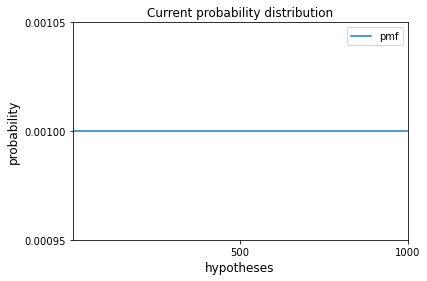

In [9]:
suite = Train(hypos)

suite.PlotProb();  # this would be the prior

That is our prior distribution. It means that each number between 1 and 1000 is equally likely to appear, for a world which **we assume** has around 1000 locomotives, tops.

But, of course, new evidence should make us change our mind. What if we see a locomotive with the number 60? How would our _opinion_ on the number of actual existent locomotives (N) change?

Well, by pure logic, we know that N cannot be smaller that the number of the train we saw, for if it were the case, we would have never seen that train in the first place. Thus, our Bayesian reasoning should reflect precisely this fact of logic:

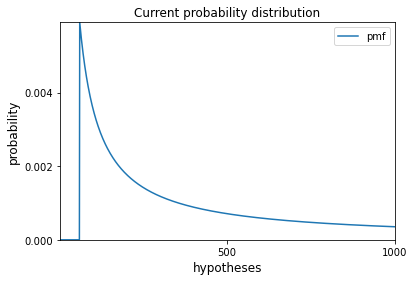

In [10]:
obs = 60  # we observe a train with the number 60
suite.Update(obs)

suite.PlotProb();  # now this would plot the posterior after observing the number 60

As we would expect, all values below 60 have been eliminated, because they have a zero probability (they are impossible). We can see that, since we do not have much background information, the distribution slowly fades away as we increase N. According to this distribution, the most likey value, if you had to guess, is 60. That might not seem like a very good guess; after all, what are the chances that you just happened to see the train with the highest number? Nevertheless, if you want to maximize the chance of getting the answer exactly right, you should guess 60.

333.41989326371095

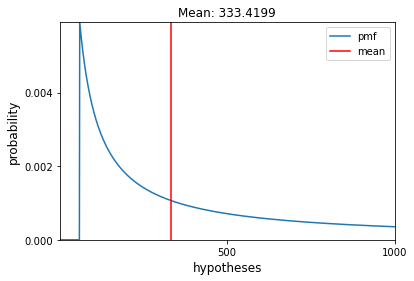

In [11]:
suite.PlotMean()

The mean of the posterior is 333, so that might be a good guess if you wanted to minimize error. If you played this guessing game over and over, using the mean of the posterior as your estimate would [minimize the mean squared error](https://en.wikipedia.org/wiki/Minimum_mean_square_error) over the long run.

To make any progress on the locomotive problem we had to **make assumptions**, and some of them were pretty arbitrary. In particular, we chose a uniform prior from 1 to 1000, **without much justification for choosing 1000, or for choosing a uniform distribution.**

It is not crazy to believe that a railroad company might operate 1000 locomotives, but a reasonable person might guess more or fewer. So we might wonder whether the posterior distribution is sensitive to these assumptions. With so little data—only one observation—it probably is. Let's find out **how sensitive** it actually is, for other priors. Say:
 - Prior 2: 500 locomotives
 - Prior 3: 2000 locomotives

In [12]:
hypos_500 = range(1, 501)
hypos_1000 = range(1, 1001)
hypos_2000 = range(1, 2001)

suite_500 = Train(hypos_500)
suite_1000 = Train(hypos_1000)
suite_2000 = Train(hypos_2000)

# after we observe a 60, this is how our posteriors differ:
suite_500.Update(60)
suite_1000.Update(60)
suite_2000.Update(60);

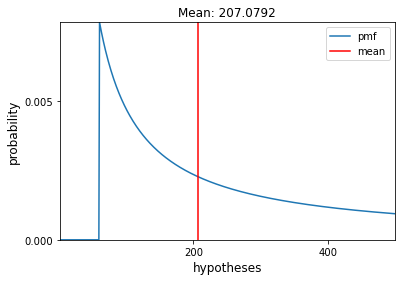

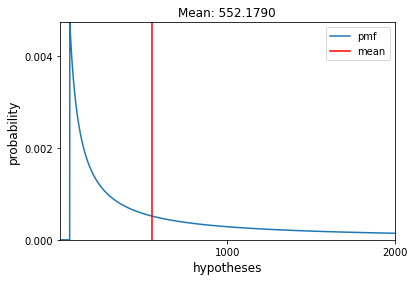

In [13]:
suite_500.PlotMean()
suite_2000.PlotMean();

With an upper bound of 500, we get a posterior mean of 207, and with an upper bound of 2000, the posterior mean is 552. 207 and 552 are very different. So that’s bad. There are two ways to proceed:

* Get more **data**: The posterior will converge faster.
* Get more **background information**: Make a more educated guesses of the prior

How would our guess of the number of total locomotives change if we were to observe another 60, then a 30 and then a 90? We would expect that they would change a lot, by kind of collapsing more and more to a narrower range of probable values, as we keep seeing new data points:

In [14]:
for obs in [30, 90]:
    suite_500.Update(obs)
    suite_1000.Update(obs)
    suite_2000.Update(obs)

In [15]:
comparison = {}
comparison.update({500: suite_500.Mean()})
comparison.update({1000: suite_1000.Mean()})
comparison.update({2000: suite_2000.Mean()})

In [92]:
pd.DataFrame(comparison.items(), columns=['guess_max_trains', 
                                          'posterior mean from uniform prior after 3 datapoints'])

,guess_max_trains,posterior mean from uniform prior after 3 datapoints
0,500,151.849588
1,1000,164.305586
2,2000,171.338181


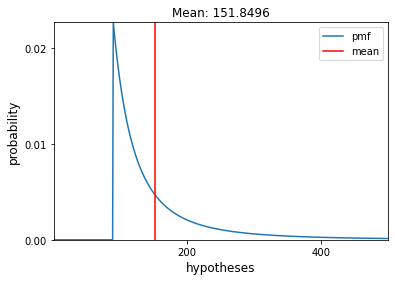

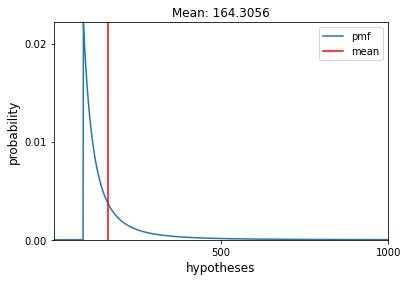

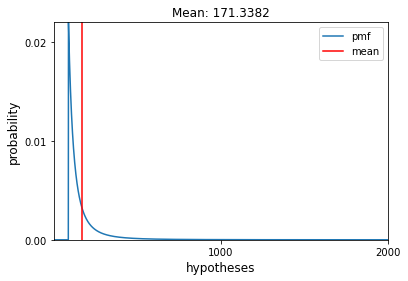

In [17]:
for suite in [suite_500, suite_1000, suite_2000]:
    suite.PlotMean()

### An alternative prior  <a id="prior"></a>

If more data are not available, another option is to improve the priors by gathering more background information. It is probably **not reasonable** to assume, as we did before, that a train-operating company with 1000 locomotives is just as likely as a company with only 1.

Just by applying some _common sense of the real world_, or some general economic knowledge, we can make some educated guesses about our prior. For example, **in most fields, there are many small companies**, fewer medium-sized companies, **and only one or two very large companies**. In fact, the distribution of company sizes tends to follow a power law. This means that the number of companies of a given size $ x $ is inversely proportional to that size $ x $:

$$ PMF(x) \propto \left( \frac{1}{x} \right)^\alpha $$

We can construct a **power-law prior** like this:

In [103]:
from think_bayes_modified import Pmf

class TrainPowerLawPrior(Train):  # we inherit from our previous class, just to change the init
    """ 
    Suite for dealing with distribution for the Locomotive Problem, assuming a Power-Law prior
    """
    def __init__(self, hypos, alpha=1.0):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, hypo**(- alpha))  # assign a power-law probab distribution at first
        self.Normalize()

In [148]:
hypos_1000 = range(1, 1001)

suite_1000_naive = Train(hypos_1000)
suite_1000_power = TrainPowerLawPrior(hypos_1000)

Distribution with naive prior, P(x) = (1/N)
Peak at: 0.001


500.5

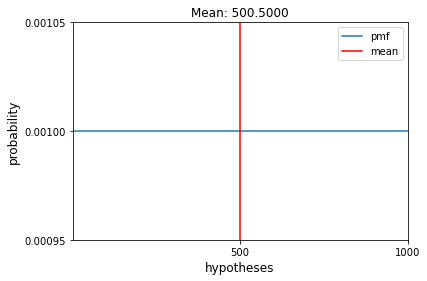

In [95]:
print("Distribution with naive prior, P(x) = (1/N)")
print(f"Peak at: {suite_1000_naive.GetMaxProb()}")
suite_1000_naive.PlotMean()

Distribution with power-law prior, P(x) = (1/x)^alpha
Peak at: 0.13359213049244018


133.59213049244266

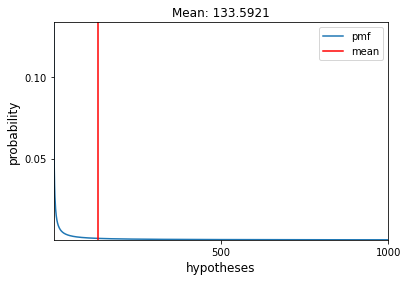

In [96]:
print("Distribution with power-law prior, P(x) = (1/x)^alpha")
print(f"Peak at: {suite_1000_power.GetMaxProb()}")
suite_1000_power.PlotMean()

We can see the prior distributions based on the uniform (naïve) probability assumption, compared to the prior based on the power law.

Using the **background information represented in the power law prior**, we can all but eliminate values of N greater than 700, and our estimates will be less sensitive to our initial guesstimation of the maximum number of existent trains.

If we start with this prior and observe trains 30, 60, and 90, the means of the posteriors are:

In [23]:
suite_500_powerlaw = TrainPowerLawPrior(hypos_500)
suite_1000_powerlaw = TrainPowerLawPrior(hypos_1000)
suite_2000_powerlaw = TrainPowerLawPrior(hypos_2000)

for obs in [30, 60, 90]:  # after we observe some trains, this is how our posteriors differ
    suite_500_powerlaw.Update(obs)
    suite_1000_powerlaw.Update(obs)
    suite_2000_powerlaw.Update(obs)

In [24]:
comparison_powerlaw = {}
comparison_powerlaw.update({500: suite_500_powerlaw.Mean()})
comparison_powerlaw.update({1000: suite_1000_powerlaw.Mean()})
comparison_powerlaw.update({2000: suite_2000_powerlaw.Mean()})

In [25]:
pd.DataFrame(comparison_powerlaw.items(), columns=['guess_max_trains', 
                                                   'posterior from power law after 3 datapoints'])

,guess_max_trains,posterior from power law after 3 datapoints
0,500,130.708470
1,1000,133.275231
2,2000,133.997463


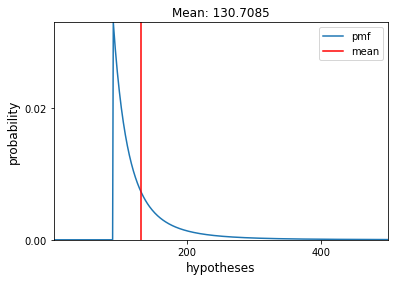

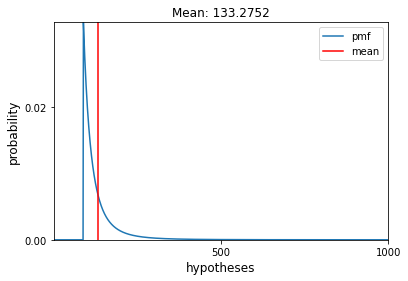

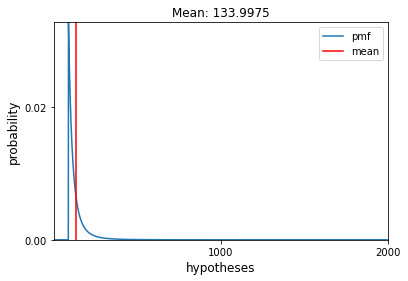

In [26]:
for suite in [suite_500_powerlaw, suite_1000_powerlaw, suite_2000_powerlaw]:
    suite.PlotMean()

Now, for several estimated upper bounds, **the differences in the mean of the posteriors are much smaller**, even in the decimals for assuming a 1000-train fleet versus a 2000-train fleet. In fact, with an arbitrarily large upper bound, the mean converges on 134.

**So the power law prior is more realistic, because it is based on general information about the size of companies, and it behaves better in practice.**

Let's now see, on the same plot, how the two "models of the world" (the two different priors) we built update their distributions when given the same pieces of evidence. In order to do that we:
- first create a function that creates a "model" with a prior and updates it (`init_model_make_posterior`)
- then create a function that compares any number of "model" posteriors for a given set of data (`compare_priors`)

In [105]:
from typing import List

def init_model_make_posterior(upper_bound: float, observed_data: float, constructor):
    """ 
    Makes and updates a Suite.
    :param upper_bound: maximum number of expected trains (possibilities)
    :param observed_data: new train number observed
    :param constructor: a class that contains a LikeLihood function, inherited from Suite
    """
    hypos = range(1, upper_bound + 1)
    suite = constructor(hypos)
    suite.name = f"upper_bound_{upper_bound}"
    
    for obs in observed_data:
        suite.Update(obs)
    return suite


def compare_posteriors_for_same_data(constructors: List, labels: List[str], upper_bound: float, 
                                     observed_data: List[float],):
    """ 
    Runs the analysis with two different priors and compares them 
    :param constructors: list of classes that contain a LikeLihood function, inherited from Suite
    :param labels: names for those constructors
    :param upper_bound: maximum number of expected trains (possibilities)
    :param observed_data: list of new train numbers observed
    """
    fig, ax = plt.subplots(figsize=(8, 4))
    for constructor, label in zip(constructors, labels):
        suite = init_model_make_posterior(upper_bound, observed_data, constructor)
        suite.name = label
        suite_dict = suite.GetDict()
        ax.plot(suite_dict.keys(), suite_dict.values(), label=label)
        ax.autoscale(tight=True, axis='both')
        ax.annotate(f"New datapoints observed: {observed_data}", (600, 0.01) )
        ax.set_title("Comparison of posteriors for different priors and same data")
        ax.set_xlabel("Number of trains"); ax.set_ylabel("Probability")
        ax.legend(fontsize=11)

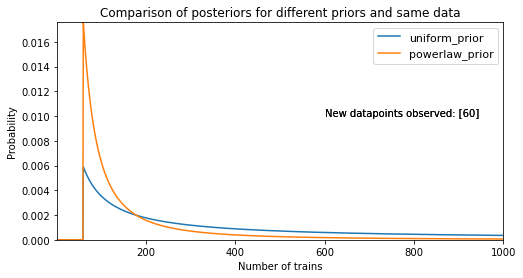

In [106]:
compare_posteriors_for_same_data(constructors=[Train, TrainPowerLawPrior],
                                 labels=['uniform_prior', 'powerlaw_prior'],
                                 upper_bound=1000,
                                 observed_data=[60])

So we see that, with a proper starting prior distribution, we can narrow down much more the posterior distribution with each new observation.

### Credible Intervals  <a id="credible"></a>

Once you have computed a posterior distribution, it is often **useful to summarize the results with a single point estimate or an interval. For point estimates it is common to use the mean, median, or the value with maximum likelihood.**

**For intervals we usually report two values computed so that there is a 90% chance that the unknown value falls between them** (or any other probability). These values define a **[credible interval](https://en.wikipedia.org/wiki/Credible_interval#:~:text=credible%20intervals%20incorporate%20problem%2Dspecific,parameters%20in%20radically%20different%20ways.)**. Notice that this interval is, conceptually speaking, **completely different from the Frequentism's [confidence interval](https://stats.stackexchange.com/questions/2272/whats-the-difference-between-a-confidence-interval-and-a-credible-interval)**.

A simple way to compute a credible interval is to add up the probabilities in the posterior distribution and record the values that correspond to probabilities 5% and 95%. In other words, the 5th and 95th percentiles.

In [115]:
def percentile(pmf, percentage: float):
    total = 0
    for val, prob in pmf.Items():
        total += prob
        if total >= percentage / 100.0:
            return val
        
def credible_interval(pmf, percentage: float = 90.0):
    """ Computes the 'percentage'% credible interval for the given distribution """
    tail = (100 - percentage) / 2
    return percentile(pmf, tail), percentile(pmf, 100 - tail)

In [155]:
suite = suite_1000_naive.Copy()
suite2 = suite_1000_power.Copy()

for obs in [60, 30, 90]:
    suite.Update(obs)
    suite2.Update(obs)

164.3055864227336

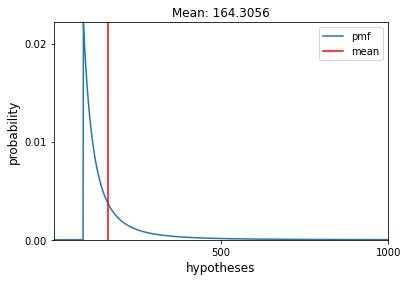

In [156]:
suite.PlotMean()

In [158]:
CI_90 = credible_interval(suite, percentage=90)
CI_95 = credible_interval(suite, percentage=95)

print("CIs for uniform prior:")
print(f"90% credible interval: {CI_90}")
print(f"95% credible interval: {CI_95}")

CIs for uniform prior:
90% credible interval: (92, 373)
95% credible interval: (91, 494)


133.2752313750312

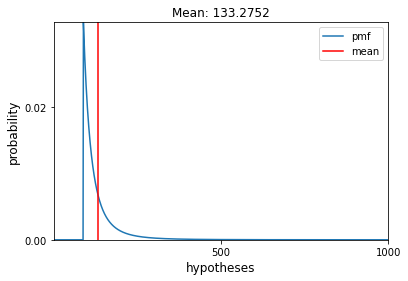

In [159]:
suite2.PlotMean()

In [160]:
CI_90 = credible_interval(suite2, percentage=90)
CI_95 = credible_interval(suite2, percentage=95)

print("CIs for power-law prior:")
print(f"90% credible interval: {CI_90}")
print(f"90% credible interval: {CI_95}")

CIs for power-law prior:
90% credible interval: (91, 242)
90% credible interval: (90, 303)


Let's wrap all this up into a function, for convinience, since later we will want to visualize things like these.

In [189]:
def plot_distrib_with_CI(pmf, CI_level: float = 90.0, title=""):
    """ Plots the credible interval specified on top of the distribution """
    mean = pmf.MeanProb
    CI = credible_interval(pmf, percentage=CI_level)
    ax = pmf.PlotProb()
    ax.set_title(f"Current Distribution with {CI_level}% credible Intervals\n{title}")
    ax.axvline(mean, color='red', label='mean')
    ax.axvspan(CI[0], CI[1], alpha=0.3, color='red', label=f"{CI_level}% CI")
    ax.annotate(f"Mean: {mean:.0f}", (750, 0.015), color='darkred')
    ax.legend(fontsize=11)

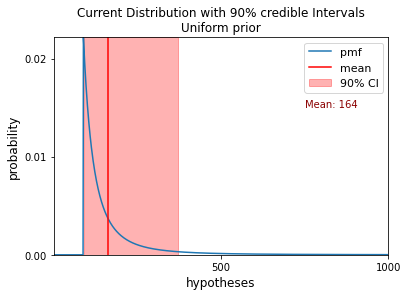

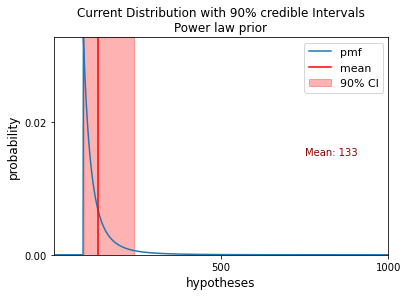

In [190]:
plot_distrib_with_CI(pmf=suite, CI_level=90, title="Uniform prior")
plot_distrib_with_CI(pmf=suite2, CI_level=90, title="Power law prior")

### Cumulative Distribution Functions  <a id="cumulative"></a>

### The German Tank Problem  <a id="german"></a>